# Part 2

In Part 1 of this assignment, we looked at Linear Regression and built a model from scratch. In practice, we usually do not build models from scratch, but use already available ones. Scikit-Learn provides a vast variety of models. You can have a look at a few different options available here (completely optional): <br>
* Overall Supervised Learning: https://scikit-learn.org/stable/supervised_learning.html <br>
* Classification: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html <br> 

Feel free to explore other models available in scikit learn. 

### Context

The tech industry has observed a tremendous rise over the past decade whereby its growing advancements have made it a dream workplace for people around the globe. Consequently, a large influx of employees is observed in the tech-industry every year. However, the competitive and fast-paced environment does offer its own consequences. It is time to analyze the prevalence of mental health issues faced by employees in tech companies and the factors affecting them.

In this Part, we will use a dataset called **Mental Health in Tech Companies** and check if we could use features related to work environment and other work-related factors of a tech employ to predict whether they suffer from mental health issues or not. 

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

**Question 0 (a):** To make things easier, you have been provided with cleaned dataset in data_tech.pkl (a pickle file). Read the file into the dataframe data_tech.

**Note:** You may need to further clean and modify the dataframe based on your model/choice of features.  

In [2]:
data_tech = pd.read_pickle('data_tech.pkl')
data_tech.head(5)

,age,gender,country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,issue,age_group
0,46,Male,United States,Yes,Yes,No,Sometimes,1-5,Yes,Yes,...,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,45+
1,36,Male,France,Yes,Yes,No,NaN,6-25,Yes,Yes,...,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No,No,35-44
2,29,Male,United States,No,Yes,Yes,Sometimes,100-500,No,Yes,...,Maybe,No,Some of them,Some of them,No,No,No,No,Yes,25-34
3,31,Male,United States,Yes,No,No,Never,1-5,Yes,Yes,...,No,No,Some of them,Some of them,No,Maybe,Yes,No,Yes,25-34
4,46,Male,United States,No,No,Yes,Often,26-100,Yes,Yes,...,Maybe,No,Some of them,Yes,No,Maybe,No,No,Yes,45+


**Question 0 (b):** Since selecting features is an important part of creating of your model, you should have a clear idea about the different columns in the dataset. Read the column descriptions from the file columns.csv into the dataframe columns and understand them. Now analyze them in data_tech using an relevant techniques. You may want to do some additional data cleaning and EDA 

**Hint:** functions like .info(), .describe() etc might be helpful. You can also have a look at the concepts used in Assignment 2/EDA Phase

In [3]:
columns = pd.read_csv('columns.csv')
data_tech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   age                        1013 non-null   int32   
 1   gender                     1013 non-null   object  
 2   country                    1013 non-null   object  
 3   self_employed              1013 non-null   object  
 4   family_history             1013 non-null   object  
 5   treatment                  1013 non-null   object  
 6   work_interfere             797 non-null    object  
 7   no_employees               1013 non-null   object  
 8   remote_work                1013 non-null   object  
 9   tech_company               1013 non-null   object  
 10  benefits                   1013 non-null   object  
 11  care_options               1013 non-null   object  
 12  wellness_program           1013 non-null   object  
 13  seek_help                  1013 n

Now that you have familiarzied yourself with the dataset, it is time to create your model!

### Feature Engineering

We want to make use of our features to predict whether an employee in the tech-industry would have mental health issues or not. 
Before making use of our features to predict whether an employee in the tech-industry would have mental health issues or not, we need to transform our raw features into new numerical/encoded features that the model could interpret i.e., we will start with feature engineering.

**Question 1:** Choose your own attributes that you would like to have in your feature set. Encode them into numerical values. This can be a iterative step, therefore, feel free to come back to this question and add/remove features.

**Hint:** You can use any encoding technique, either manually or using libraries like scikit learn. 

In [4]:
data_tech.nunique()

age                          45
gender                        3
country                      45
self_employed                 2
family_history                2
treatment                     2
work_interfere                4
no_employees                  6
remote_work                   2
tech_company                  1
benefits                      3
care_options                  3
wellness_program              3
seek_help                     3
anonymity                     3
leave                         5
mental_health_consequence     3
phys_health_consequence       3
coworkers                     3
supervisor                    3
mental_health_interview       3
phys_health_interview         3
mental_vs_physical            3
obs_consequence               2
issue                         2
age_group                     5
dtype: int64

In [5]:
from sklearn import preprocessing

data_tech = data_tech.drop(columns=['work_interfere'])   ## contains null values
data_tech = data_tech.drop(columns=['age_group'])        ## redundant as age already given
data_tech = data_tech.drop(columns=['tech_company'])     ## contains only 1 value

data_tech_fit = data_tech
for column in data_tech_fit.columns:
    if column == 'age':
        continue
    le = preprocessing.LabelEncoder()
    data_tech_fit[column] = le.fit_transform(data_tech_fit[column])

**Question 2:** Create a correlation matrix to see how do your selected features correlate with each other and **the test attribute**. 

In [6]:
corr_data_tech_fit = data_tech_fit.corr(method='pearson')
corr_data_tech_fit.style.background_gradient(cmap='YlGnBu').set_precision(3) 

,age,gender,country,self_employed,family_history,treatment,no_employees,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,issue
age,1.000,0.083,0.142,0.068,0.004,0.072,0.029,0.158,0.145,0.099,0.104,0.118,0.044,-0.030,0.047,-0.039,-0.010,0.007,0.058,-0.023,-0.019,0.063,0.086
gender,0.083,1.000,-0.113,0.039,-0.085,-0.147,0.024,0.003,-0.064,-0.090,0.011,-0.011,-0.003,0.052,0.023,0.043,0.049,0.082,-0.063,-0.033,-0.010,-0.046,-0.060
country,0.142,-0.113,1.000,-0.137,0.064,0.095,0.106,-0.020,0.109,0.094,0.044,0.005,-0.008,-0.111,-0.030,-0.010,-0.026,0.014,0.080,-0.006,-0.019,-0.027,0.046
self_employed,0.068,0.039,-0.137,1.000,0.017,0.020,-0.360,0.307,-0.056,0.053,0.019,0.036,0.120,0.168,0.025,0.003,0.070,0.047,-0.012,-0.030,0.131,0.090,0.056
family_history,0.004,-0.085,0.064,0.017,1.000,0.390,-0.035,0.023,0.094,0.099,0.032,-0.003,0.049,0.025,0.013,0.028,0.014,0.020,0.046,0.065,0.038,0.119,0.233
treatment,0.072,-0.147,0.095,0.020,0.390,1.000,-0.040,0.035,0.220,0.240,0.065,0.068,0.124,0.048,0.010,-0.014,0.095,-0.033,0.107,0.071,0.040,0.115,0.499
no_employees,0.029,0.024,0.106,-0.360,-0.035,-0.040,1.000,-0.212,0.133,-0.006,0.076,0.060,-0.001,-0.092,-0.013,-0.045,-0.074,-0.034,-0.003,0.019,-0.019,-0.032,-0.053
remote_work,0.158,0.003,-0.020,0.307,0.023,0.035,-0.212,1.000,-0.050,0.024,-0.045,-0.028,-0.002,0.097,0.061,-0.035,0.080,0.026,-0.038,-0.004,0.051,-0.009,0.032
benefits,0.145,-0.064,0.109,-0.056,0.094,0.220,0.133,-0.050,1.000,0.425,0.296,0.372,0.335,0.049,-0.014,-0.031,-0.001,0.014,0.028,0.014,0.146,0.035,0.148
care_options,0.099,-0.090,0.094,0.053,0.099,0.240,-0.006,0.024,0.425,1.000,0.162,0.223,0.330,0.138,-0.009,0.028,0.010,0.043,0.034,0.020,0.144,0.036,0.164


**Question 3:** Next, we want to create our feature set and our label vector. Extract your chosen attributes from the dataframe and create a feature set. Similarly, create a label vector. Decide which column will be appropriate to act as a label vector. Give reasoning for your choice of both the feature set and test vector at the end of the cell as comments. Also comment on the shape of both of them.

In [7]:
# Enter Code here
Feature_set = data_tech_fit.drop(columns=['issue'])
Feature_set = Feature_set.to_numpy()
Label = data_tech_fit['issue']
Label = Label.to_numpy()

print(Feature_set.shape)
print(Label.shape)

# Reasoning about Feature Set:
## work interfere was removed because it contained Nan values
## age group was dropped because we already had a column of age so it was redundant
## tech comapany was dropped because it was same across all the rows so it is not related to our label variable

# Reasoning about Test Label:
## issue is the appropriate label vector because it indicates whether a person has mental health issues or not so it can be used to predict if a person has 
# mental health issues or not

# Comments about shape of feature set and test label
## feature set is a 2d array of 1013 rows where each row represents record of an individual while the 22 columns represent the features used to predict the
# label variable

## test label is a 1d array of 1013 values containing labels for each individual. 

(1013, 22)
(1013,)


In [8]:
print("The Feature Set of our Model:\n\n",Feature_set)

The Feature Set of our Model:

 [[46  1 42 ...  2  2  1]
 [36  1 14 ...  0  0  0]
 [29  1 42 ...  1  1  0]
 ...
 [32  1 42 ...  1  2  0]
 [34  1 42 ...  1  1  0]
 [46  0 42 ...  1  1  0]]


In [9]:
print("Labels:",Label)

Labels: [1 0 1 ... 1 1 0]


### Creating the Model

Unlike the previous part, this is not a simple linear regression problem. This is a classification problem. Lets apply a **K-Nearest Neighbor Model** to it. The application of KNN Classifier via scikit learn is similar to the application of other models that have been covered in class (e.g., Linear Regression). It is, however, recommended to read up about knn using the resources mentioned below:

K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in industry. K-nearest neighbors (KNN) algorithm uses ‘feature similarity’ to predict the values of new datapoints which further means that the new data point will be assigned a value based on how closely it matches the points in the training set.
You can read more on KNNs from this documentation. It will also help you build the model ahead:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

**Importing Scikit Learn Libraries**

In [10]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import train_test_split # For splitting dataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, multilabel_confusion_matrix # Evaluation metrics
from sklearn.neighbors import KNeighborsClassifier # KNN Classifier

**Splitting Data**

To set up a model, you first have to split your data into train and test sets. We can do this manually, but that will not be an optimized approach and can include biases. Therefore, we have an in-built function for it: train_test_split <br> Read this documentation to see how to use it: <br> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


**Question 4:** Split the data into train and set into a split ratio of your choice. Also, provide a reason of the selection split ratio.
**Hint:** It is a one-liner!

In [11]:
# Split dataset into training set and test set. Choose the test_size parameter yourself. 

X_train, X_test, y_train, y_test = train_test_split(Feature_set, Label, test_size=0.3, random_state=42)

# Reasoning for selected split ratio:
# 70% being training data is sufficient enough to make the model complex 
# while 30% being test data is reasonable enough for a better estimate of generalization error

# Printing shapes
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (709, 22) (709,)
Test set: (304, 22) (304,)


**Question 5:** Now let's create the KNN classifier. Follow the guidelines below to create, fit, and make predictions using your initial classifier. Refer to the KNN documentation for help. Then calculate the accuracy of the classifier.

In [12]:
# Create KNN Classifier. Keep any value of K for now e.g. 3,5,7...

# Train the model using the training sets

# Predict the response for test dataset
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

We can now calculate the initial accuracy of our model. Remember that we have not optimized any parameters yet.

In [13]:
# Model Accuracy, how often is the classifier correct?
Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy in Percentage:", Accuracy)

Accuracy in Percentage: 0.7401315789473685


There is no right or wrong answer wrt accuracy and how high it should be. However, if your accuracy is very low, try reitering/ improving features etc. 

### Optimization

One of the main parameters for KNN is the number of neighbors. We want to find out for which value of K will the loss be minimized. To do that, we create models for varying values of K, and plot a graph of Error Rate against Number of Neighbors.

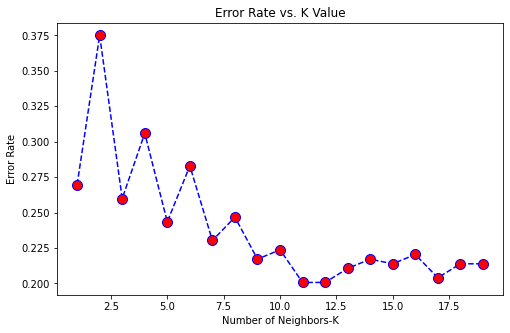

Minimum error:  0.20066 at K = 11


In [14]:
# No changes are needed in this cell. However, you can change the variable names etc.
error_rate = []

for i in range(1,20): 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

plt.figure(figsize=(8,5))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('Number of Neighbors-K')
plt.ylabel('Error Rate')
plt.show()

min_val = 1+error_rate.index(min(error_rate))
print("Minimum error: ",np.around(min(error_rate),decimals=5),"at K =", min_val)

**Question 6:** Now that you know the optimum value for K, create another model using this value. Also predict using X_train (as well as X_test) and store their results in separate variables. We will use that in the next question. <br>

In [15]:
# Create KNN Classifier

# Train the model using the training sets

# Predict the response for Test data

# Predict the response for Train data
neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(X_train, y_train)
y_pred_train = neigh.predict(X_train)
y_pred_test = neigh.predict(X_test)

### Evaluation Metrics

**Question 7:**  The final part of the modelling process is evaluation of the model. There a different metrices that we can use to do so. Scikit Learn has in-built functions for calculating each metric. Look up for these functions and print the following: 

*   Train Accuracy
*   Test Accuracy
*   F1 Score
*   Precision
*   Recall

In [16]:
print("Train Accuracy =", accuracy_score(y_train, y_pred_train))
print("Test Accuracy =", accuracy_score(y_test, y_pred_test))
print("F1 score =", f1_score(y_test, y_pred_test))
print("Precision =", precision_score(y_test, y_pred_test))
print("Recall =", recall_score(y_test, y_pred_test))

Train Accuracy = 0.7912552891396333
Test Accuracy = 0.7993421052631579
F1 score = 0.8842504743833016
Precision = 0.8175438596491228
Recall = 0.9628099173553719


**Question 8:** As a final exercise, we want to summarize our prediction results using a confusion matrix. Create and display a confusion matrix that shows the test predictions. Again, use sklearn's built in function for the purpose.

**Note:** Do not forget to label the plot properly.

Confusion Matrix =
 [[[233   9]
  [ 52  10]]

 [[ 10  52]
  [  9 233]]]


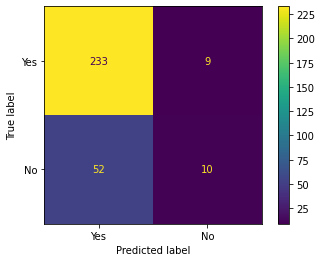

In [17]:
confusion_matrix =  multilabel_confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix =\n", confusion_matrix)
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix[0])
disp.plot()
plt.xticks([0, 1], ['Yes', 'No'])
plt.yticks([0, 1], ['Yes', 'No'])
plt.show()

**Question 9:** Do the above results validate the accuracy, recall, and precision scores that you received in **Question 7**? <br>Manually calculate the accuracy, precision, and recall of the test predicitions. Do not forget to state the formula you used for each.

Accuracy = (true positives + true negatives) / total 
Accuracy = (233 + 10) / 304 = 0.799

Recall = true positives / (true positive + false positive)
Recall = 233 / (233 + 9) = 0.9628

Precision = true positives / (true positives + false negative)
Precision = 233 / (233 + 52) = 0.8175

Yes the above results do validate accuracy, recall, and precision scores that received in Question 7

### Yayy, Good Job!

Congratulations! You have successfully completed your assignment on creating machine learning models. In this part, we saw how implementations are already available in libraries such as Scikit Learn, which streamlines the entire process of machine learning. Various parameters can also be tuned in order to increase performances. <br> We hope that you enjoyed this assignment, and have gained some hands on experience of building machine learning models and classifiers. <br> 

This also wraps up CS334's assignments. Good job and all the best for the remaining semester! :')